#### Advance NLP : Hate Speech detection using Transformers (Deep Learning) 
 

Hate Speech Detection using Transformers (Deep Learning)
Dataset Link (Links to an external site.)

Problem Statement

The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, We will take you through a hate speech detection model with Machine Learning and Python.

Hate Speech Detection is generally a task of sentiment classification. So for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So for the task of hate speech detection model, We will use the Twitter tweets to identify tweets containing  Hate speech.

#### By :Mohammad Alghani 

In [179]:
# Data Manipulation 
#=====================================
import pandas as pd 
import numpy as np
# Data Visualization  
#=====================================
import matplotlib.pyplot as plt 
import seaborn as sns 
# Nlp 
#=====================================
import nltk
import spacy
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Rejex
#=====================================
import re 
# Tfidf
#=====================================
from sklearn.feature_extraction.text import TfidfVectorizer
# Split the Data
#=====================================
from sklearn.model_selection import train_test_split 
# Word Cloud
#=====================================
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
# Model
#=====================================
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping 
#Metreix
#=======================================
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#Warnings 
#=====================================
import warnings 
warnings.filterwarnings('ignore')

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Load The Data 

In [180]:
df=pd.read_csv('train_E6oV3lV.csv')

In [181]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [182]:
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


### <font color = #27C3E5> 1.3: </font> <font color = #41EA46> Data Information</font>

####  <font color = Green> 1.3.1: How many numbers of observations and features</font>

In [183]:
print(f'Number of Observation: {df.shape[0]}')
print(f'Number of Feature: {df.shape[1]}')

Number of Observation: 31962
Number of Feature: 3


####  <font color = Red> 1.3.2: Features that we have in this data</font>

In [184]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

#### <font color = pink> 1.3.3: Type of Data</font>

In [185]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

#### <font color=Yellow> 1.3.4: Data Info </font>

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


#### <font color= Red>1.3.5 Data size </font>

In [187]:
df.size

95886

#### <font color = white> 1.3.6: Predictor and Target Attribute</font>

In [188]:
text=df.iloc[:,2]
text.head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [189]:
label=df.iloc[:,1]
label.tail()

31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, dtype: int64

#### <font color = white> 1.3.7: Check the Missing Value</font>

In [190]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

#### <font color = white> 1.3.8: Extracting the Target Attribute for Each Class and Visualize </font>

In [191]:
hate_speech=df[df['label']==1].shape[0]
free_speech=df[df['label']==0].shape[0]
print('Hate speech=',hate_speech)
print('Free speech=',free_speech)

Hate speech= 2242
Free speech= 29720


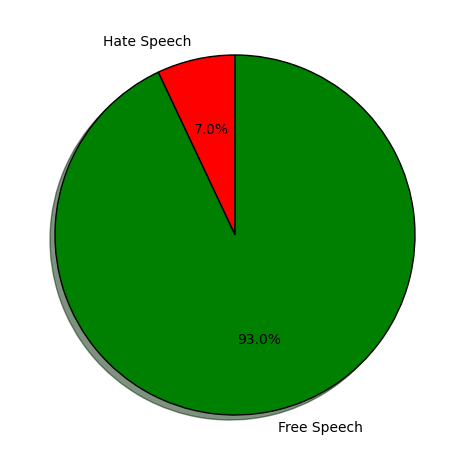

In [192]:
speech=[hate_speech,free_speech]
label=['Hate Speech','Free Speech']

plt.pie(speech,labels=label,shadow=True,wedgeprops={'edgecolor':'black'},autopct="%1.1f%%",startangle=90,colors=['red','green'])
plt.tight_layout()
plt.show()

<img style="width:70px; height:70px; float:left;" src="https://thumbs.gfycat.com/DisgustingSpiffyIguana-size_restricted.gif"><img style="width:70px; height:70px; float:right;" src="https://thumbs.gfycat.com/DisgustingSpiffyIguana-size_restricted.gif"><h2 style="background-color:black; color:white; text-align:center;"><b><i>Part 2: Data Preprocessing</i></b></h2>

In this part, we did data preprocessing. firstly, we did text cleaning with the help of Regular Expression and then we apply preprocessing operations like Tokenization to make a token of each sentence, then remove stop words like "the", "a", "at" etc and then apply stemming to reducing a word to its word stem. After that, we apply the IF-IDF model for feature extraction and we took 2000 most frequent words from dictionaries. In the end, we split our data for training and testing. And ratio for training and testing is 0.8 and 0.2 respectively. 
    
### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Text Cleaning </font>
> <b>Lowercase <br> Remove Punctuation <br> Remove Urls <br> Removing @tags <br> Remove Special Characters </b>

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color=Green> 2.1.1 Lower Case </font>

In [193]:
# def lower_case(text):
#     return text.lower()

# df['tweet']=df['tweet'].apply(lower_case)

#### <font color=Green> 2.1.2 Remove Punctuation </font>

In [194]:
# def remove_punct(text):
#     return text.translate(str.maketrans('','',string.punctuation))

# df['tweet']=df['tweet'].apply(remove_punct)

#### <font color = Green>2.1.3: Remove URLs </font>

In [195]:
# def remove_punct_and_url(text):
#     text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     return text


# df['tweet'] = df['tweet'].apply(remove_punct_and_url)

#### <font color = Green>2.1.4: Remove Tags </font>

In [196]:
# def remove_tag(text):
#     newtext=re.sub(r'@[A-Za-z0-9]+',"",text)
#     return newtext

# df['tweet']=df['tweet'].apply(remove_tag)

#### <font color = Green>2.1.5: Remove Special Characters </font>

In [197]:
# def remove_special(text):
#     return " ".join (e for e in text.split() if e.isalnum())

# df['tweet']=df['tweet'].apply(remove_special)

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46>  Preprocessing Operations </font>
> <b>Tokenizing <br> Removing Stop Words <br> Lemmatization <b> <br> WordCloud </b>

#### <font color = Green>2.2.1: Tokenizing

In [198]:
# def tokenize(text):
#     text=word_tokenize(text)
#     return text 

# df['tweet']=df['tweet'].apply(tokenize)

#### <font color = Red>2.2.2: Removing StopWords

In [199]:
# def remove_stop(text):
#     text=[i for i in text if not i in stopwords.words('english')]
#     return text


# df['tweet']=df['tweet'].apply(remove_stop)

#### <font color = Green>2.2.3: Lemmatization

In [200]:
# nltk.download('wordnet')
# def Lemmatize(text):
#     word_lem=WordNetLemmatizer()
#     text=[word_lem.lemmatize(token)  for token in text]
#     return text 

# df['tweet'] = df['tweet'].apply(Lemmatize)

In [201]:
X=df.drop(columns=['label'],axis=1)
y=df['label']
messages=X.copy()

In [202]:
nltk.download('stopwords')
ps=WordNetLemmatizer()
corpus=[]
for i in range(len(messages)):
  text=re.sub('[^a-zA-Z]',' ',messages['tweet'][i])
  text=text.lower()
  text=text.split() ## Get word by word

  text=[ps.lemmatize(word) for word in text if not word in stopwords.words('english')]
  text=' '.join(text)
  corpus.append(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### <font color = Red>2.2.4: WordCloud

#### For The Hate Speech 

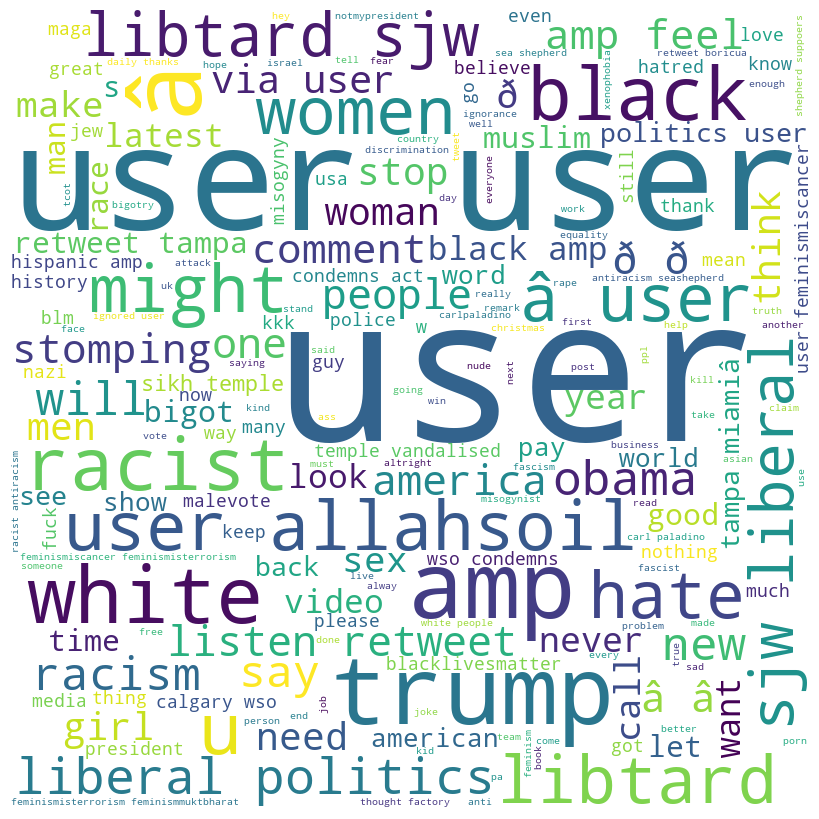

In [203]:
hate_speech=df[df['label']==1]
comment_words=''
stopwords=set(STOPWORDS)
for val in hate_speech.tweet:
    val=str(val)
    tokens=val.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    comment_words+=" ".join(tokens)+" "

wordcloud=WordCloud(width=800,height=800,background_color='white',stopwords=stopwords,min_font_size=10).generate(comment_words)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


#### For The Free Speech 

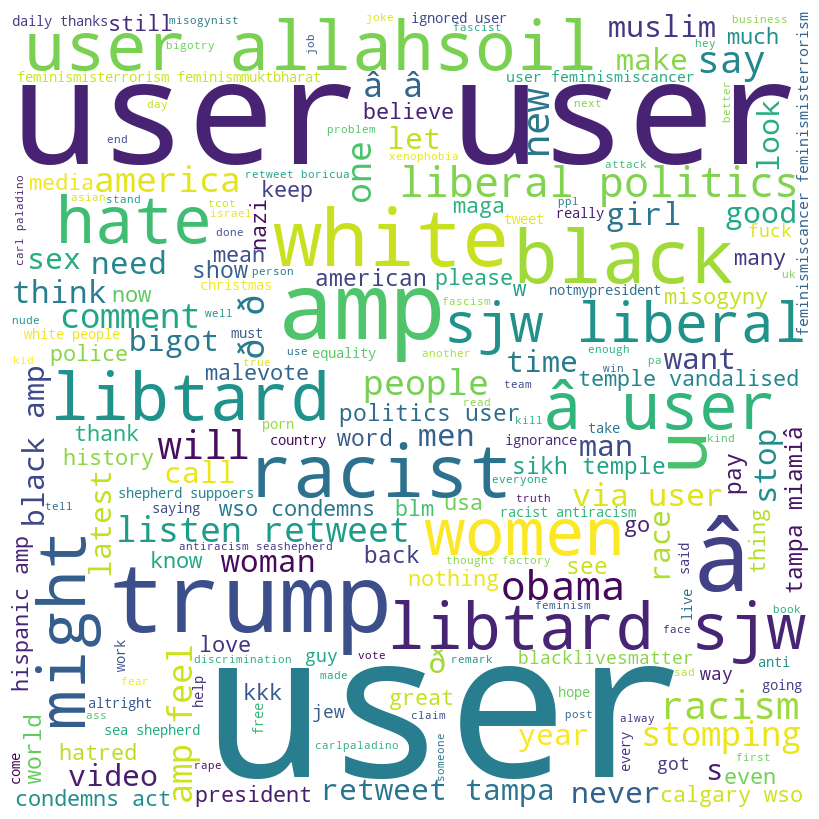

In [204]:
free_speech = df[df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in free_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [205]:
df['tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46>  Feature Extraction </font>
<font color = Red><b>2.3.1: Embadding Way  </b> <br> 

In [206]:
### First we do one hot encoding 
voc_size=5000
corpus=df['tweet'].astype(str)
one_hot_rep=[one_hot(words,voc_size) for words in corpus]

In [207]:
one_hot_rep

[[1891,
  4836,
  3367,
  1476,
  4500,
  3144,
  2545,
  4500,
  4243,
  4874,
  1157,
  3693,
  2774,
  3981,
  3538,
  2774,
  3990,
  2592],
 [1891,
  1891,
  4373,
  796,
  3133,
  1667,
  3416,
  4834,
  2870,
  3637,
  3246,
  727,
  4254,
  1120,
  4528,
  212,
  3233,
  2605,
  108],
 [2848, 1282, 438],
 [2718, 3416, 2486, 2938, 561, 4422, 2938, 4816, 1356, 4871, 212, 2073, 351],
 [4434, 1393, 1841, 4213],
 [2629,
  2629,
  2980,
  2987,
  1659,
  2545,
  1970,
  2116,
  3734,
  3246,
  3850,
  2515,
  2545,
  1219,
  1100,
  4836,
  3246,
  619,
  3975,
  2602],
 [1891, 2427, 4676, 1891, 1891, 1891, 1891, 1891, 1891, 1891, 4617],
 [1356,
  4004,
  145,
  4675,
  4500,
  1356,
  4675,
  796,
  2164,
  3083,
  4834,
  3717,
  2419,
  1862,
  1353,
  145,
  2164,
  732,
  1006,
  4807,
  408,
  3169],
 [4976, 4089, 2486, 1356, 2294, 1619, 3818, 3668, 3143, 1358, 1451],
 [1891, 1891, 923, 1816, 3911, 833, 4243, 4159],
 [4105,
  2836,
  4131,
  3722,
  4241,
  4887,
  502,
  1158,

In [208]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [209]:
sent_lenght=20
embedded_docs=pad_sequences(one_hot_rep,padding='pre',maxlen=sent_lenght)
embedded_docs

array([[   0,    0, 1891, ..., 2774, 3990, 2592],
       [   0, 1891, 1891, ..., 3233, 2605,  108],
       [   0,    0,    0, ..., 2848, 1282,  438],
       ...,
       [   0,    0,    0, ...,  874, 4500, 1469],
       [   0,    0,    0, ..., 3155, 3017, 1023],
       [   0,    0,    0, ...,  796, 1296, 2193]])

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46>  Split the Dataset </font>

In [210]:
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [211]:
y_final

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [212]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (25569, 20)
y_train (25569,)


In [213]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (6393, 20)
y_test (6393,)


In [214]:
X_train.shape[1]

20

<img style="width:70px; height:70px; float:left;" src="https://www.pinclipart.com/picdir/big/163-1639462_work-pc-sticker-pc-gif-transparent-clipart.png"><img style="width:70px; height:70px; float:right;" src="https://www.pinclipart.com/picdir/big/163-1639462_work-pc-sticker-pc-gif-transparent-clipart.png"><h2 style="background-color:black; color:white; text-align:center;"><b><i>Part 3: Build the Rnn with LSTM </i></b></h2>

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46>   Long Short Term Memory </font>

In [215]:
#### Early stopping
es=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
) 

In [216]:
embedding_vector_features=40 ### each word will represent in a vector size of 40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_lenght))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#### <font color = Yellow>3.1.3: Compile the Model

In [217]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### <font color = Yellow>3.2.4: Fit the Training Data into Model

In [218]:
history=model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test),callbacks=[es])

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9266 - loss: 0.2806 - val_accuracy: 0.9479 - val_loss: 0.1478
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9611 - loss: 0.1102 - val_accuracy: 0.9545 - val_loss: 0.1365
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9742 - loss: 0.0770 - val_accuracy: 0.9521 - val_loss: 0.1428


#### <font color = Yellow>3.2.5: Predict the Train and Test Data

In [219]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
